In [2]:
import os
import sys

import numpy as np
import tensorflow as tf

from net import nn
from utils import config, util
from utils.dataset import input_fn

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

#Sets the threshold for what messages will be logged.
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
from google.cloud import storage
client = storage.Client()
bucket = client.get_bucket('purcodata')

In [5]:
# Then do other things...
blob = bucket.get_blob('spatial/neurips_data/EC/collapsed/*.png')
print(blob)

None


In [6]:
blob

In [ ]:
blob.upload_from_string('New contents!')
blob2 = bucket.blob('remote/path/sto')
blob2.upload_from_filename(filename='/local/path.txt')

In [4]:
pip install python-gdcm

     |████████████████████████████████| 9.4 MB 5.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import gdcm
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import pydicom
import scipy.ndimage
import gdcm

from os import listdir, mkdir
import os

In [13]:
listdir("/")

['srv',
 'tmp',
 'home',
 'bin',
 'usr',
 'lib',
 'sys',
 'opt',
 'dev',
 'root',
 'vmlinuz.old',
 'lost+found',
 'sbin',
 'var',
 'etc',
 'mnt',
 'lib64',
 'snap',
 'initrd.img',
 'proc',
 'boot',
 'run',
 'spatial',
 'media',
 'vmlinuz']

In [14]:
def create_tf_example(encoded_image, encoded_label, full_image_path):

    height = 256
    width = 256
    input_channels = 3

    Example = tf.train. Example(
    features=tf.train. Features(feature={
    'image/encoded': _bytes_feature(encoded_image),
    'image/filename': _bytes_feature(full_image_path.encode('utf8')),
    'image/height': _int64_feature(height),
    'image/width': _int64_feature(width),
    'image/channels': _int64_feature(3),
    'image/segmentation/class/encoded': _bytes_feature(encoded_label),
    'image/format': _bytes_feature('png'.encode('utf8')),
    'image/segmentation/class/format':_bytes_feature('png'.encode('utf8'))
    }))
    return example

In [ ]:
import tensor flow as tf

flags = tf.app.flags.DEFINE_string('output_path', '', 'Path to output TFRecord')
FLAGS = flags.FLAGS


# Util functions
def _bytes_feature(values):
    return tf.train. Feature(
    bytes_list=tf.train. BytesList(value=[values]))

def _int64_feature(values):
    if not is instance(values, (tuple, list)):
    values = [values]
    return tf.train. Feature(int64_list=tf.train. Int64List(value=values))

#
# Main function for creating an example
#
def create_tf_example(example):
    # TODO(user): Populate the following variables from your example.
    height = 256 # Image height
    width = 256 # Image width
    channels = 3 # Input image Channels
    filename = None # Filename of the image. Empty if image is not from file
    encoded_image = None # Encoded image bytes
    encoded_label = None # Encoded ground truth image bytes
    format = None # b'jpeg' or b'png'

    example = tf.train. Example(features=tf.train. Features(feature={
     'image/encoded': _bytes_feature(encoded_image),
     'image/filename': _bytes_feature(filename.encode('utf8')),
     'image/height': _int64_feature(height),
     'image/width': _int64_feature(width),
     'image/channels': _int64_feature(channels),
     'image/segmentation/class/encoded': _bytes_feature(encoded_label),
     'image/format': _bytes_feature(format.encode('utf8')),
     'image/segmentation/class/format':_bytes_feature(format.encode('utf8'))
    }))
    return example

def main(_):
    writer = tf.python_io.TFRecordWriter(FLAGS.output_path)

    # TODO(user): Write code to read in your data set to examples variable

    for example in examples:
        example = create_tf_example(example)
        writer.write(example. SerializeToString())

    writer.close()

if __name__ == '__main__':
    tf.app.run()

In [1]:
"""Converts PASCAL VOC 2012 data to TFRecord file format with Example protos.
PASCAL VOC 2012 dataset is expected to have the following directory structure:
  + pascal_voc_seg
    - build_data.py
    - build_voc2012_data.py (current working directory).
    + VOCdevkit
      + VOC2012
        + JPEGImages
        + SegmentationClass
        + ImageSets
          + Segmentation
    + tfrecord
Image folder:
  ./VOCdevkit/VOC2012/JPEGImages
Semantic segmentation annotations:
  ./VOCdevkit/VOC2012/SegmentationClass
list folder:
  ./VOCdevkit/VOC2012/ImageSets/Segmentation
This script converts data into sharded data files and save at tfrecord folder.
The Example proto contains the following fields:
  image/encoded: encoded image content.
  image/filename: image filename.
  image/format: image file format.
  image/height: image height.
  image/width: image width.
  image/channels: image channels.
  image/segmentation/class/encoded: encoded semantic segmentation content.
  image/segmentation/class/format: semantic segmentation file format.
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import math
import os.path
import sys
from utils import build_data
from six.moves import range
import tensorflow as tf
from utils import config
import json
import matplotlib.pyplot as plt
import numpy as np

IMG_SIZE = config.width
IMAGE_SIZE = [IMG_SIZE, IMG_SIZE]
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = config.batch_size

# FILENAMES = tf.io.gfile.glob("/spatial/data/DeepLab-tf/Dataset/tfRecords/test/*.tfrecord")
# dataset = util.get_dataset(FILENAMES, False)
# split_ind = int(0.75 * len(FILENAMES))
# TRAINING_FILENAMES, VALID_FILENAMES = FILENAMES[:split_ind], FILENAMES[split_ind:]

# print("Train TFRecord Files:", len(TRAINING_FILENAMES))
# print("Validation TFRecord Files:", len(VALID_FILENAMES))

# dataset = util.get_dataset(TRAINING_FILENAMES, False)
# valid_dataset = util.get_dataset(VALID_FILENAMES, False)



In [2]:
output_dir = '/spatial/data/DeepLab-tf/Dataset/tfRecords/test/'

# FLAGS = tf.app.flags.FLAGS

# tf.app.flags.DEFINE_string('image_folder',
#                            './VOCdevkit/VOC2012/JPEGImages',
#                            'Folder containing images.')

# tf.app.flags.DEFINE_string(
#     'semantic_segmentation_folder',
#     './VOCdevkit/VOC2012/SegmentationClassRaw',
#     'Folder containing semantic segmentation annotations.')

# tf.app.flags.DEFINE_string(
#     'list_folder',
#     './VOCdevkit/VOC2012/ImageSets/Segmentation',
#     'Folder containing lists for training and validation')

# tf.app.flags.DEFINE_string(
#     'output_dir',
#     './tfrecord',
#     'Path to save converted SSTable of TensorFlow examples.')


_NUM_SHARDS = 4


def _convert_dataset(prov):
    """ 
    Converts the specified dataset split to TFRecord format.
    Args:
    dataset_split: The dataset split (e.g., train, test).
    Raises:
    RuntimeError: If loaded image and label have different shape.
    """
        
    path =os.path.join(config.data_dir,config.data_splits)
    with open(path, 'r') as JSON:
        json_dict = json.load(JSON)
    filenames =json_dict[prov][1][:100]

#     dataset = os.path.basename(dataset_split)[:-4]
    sys.stdout.write('Processing ' + prov)
    #filenames = [x.strip('\n') for x in open(dataset_split, 'r')]
    num_images = len(filenames)
    num_per_shard = int(math.ceil(num_images / _NUM_SHARDS))

#     image_reader = build_data.ImageReader('png', channels=3)
#     label_reader = build_data.ImageReader('png', channels=3)

    for shard_id in range(_NUM_SHARDS):
        output_filename = os.path.join(
            output_dir,'%s-%05d-of-%05d.tfrecord' % (prov, shard_id, _NUM_SHARDS))

        with tf.compat.v1.python_io.TFRecordWriter(output_filename) as tfrecord_writer:
            start_idx = shard_id * num_per_shard
            end_idx = min((shard_id + 1) * num_per_shard, num_images)
            for i in range(start_idx, end_idx):
                sys.stdout.write('\r>> Converting image %d/%d shard %d' % (
                    i + 1, len(filenames), shard_id))
                sys.stdout.flush()
                # Read the image.
                image_filename =os.path.join(config.data_dir,filenames[i].split('/')[0],
                                             config.image_dir, filenames[i].split('/')[1] )                                  
                image_data = tf.compat.v1.gfile.GFile(image_filename, 'rb').read()
                height, width = config.height, config.width

                # Read the semantic segmentation annotation.
                seg_filename = os.path.join(config.data_dir, filenames[i].split('/')[0], 
                                            config.label_dir, filenames[i].split('/')[1])
                seg_data = tf.compat.v1.gfile.GFile(seg_filename, 'rb').read()
#                 seg_data = tf.compat.v1.gfile.GFile(seg_filename, 'rb').read()

                #                 print(seg_data)
                seg_height, seg_width = config.height, config.width

                if height != seg_height or width != seg_width:
                    raise RuntimeError('Shape mismatched between image and label.')

                # Convert to tf example.
                filename_image =os.path.join(filenames[i].split('/')[0],config.image_dir,
                                             filenames[i].split('/')[1] )      
                filename_label = os.path.join(filenames[i].split('/')[0],config.label_dir,
                                              filenames[i].split('/')[1] )      
                example = build_data.image_seg_to_tfexample(
                    image_data, filename_image, filename_label, height, width, seg_data)
                tfrecord_writer.write(example.SerializeToString())

        sys.stdout.write('\n')
        sys.stdout.flush()


def main(unused_argv):
    provinces =['EC','FS','GT','KZN','LIM','MP','NC','NW','WC']
    
    for prov in provinces:
        _convert_dataset(prov)


if __name__ == '__main__':
    tf.compat.v1.app.run()

>> Converting image 25/100 shard 0
>> Converting image 50/100 shard 1
>> Converting image 75/100 shard 2
>> Converting image 100/100 shard 3
>> Converting image 25/100 shard 0
>> Converting image 50/100 shard 1
>> Converting image 75/100 shard 2
>> Converting image 100/100 shard 3
>> Converting image 25/100 shard 0
>> Converting image 50/100 shard 1
>> Converting image 75/100 shard 2
>> Converting image 100/100 shard 3
>> Converting image 25/100 shard 0
>> Converting image 50/100 shard 1
>> Converting image 75/100 shard 2
>> Converting image 100/100 shard 3
>> Converting image 25/100 shard 0
>> Converting image 50/100 shard 1
>> Converting image 75/100 shard 2
>> Converting image 100/100 shard 3
>> Converting image 25/100 shard 0
>> Converting image 50/100 shard 1
>> Converting image 75/100 shard 2
>> Converting image 100/100 shard 3
>> Converting image 25/100 shard 0
>> Converting image 50/100 shard 1
>> Converting image 75/100 shard 2
>> Converting image 100/100 shard 3
>> Converting

SystemExit: 

/home/purco/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [8]:
import cv2
path = '/spatial/data/neurips_data/KZN/collapsed/2831B___12032_8192.png'
cv2.cvtColor(cv2.imread(path, -1), cv2.COLOR_BGR2RGB)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [201, 201, 201],
        [201, 201, 201],
        [201, 201, 201]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [201, 201, 201],
        [201, 201, 201],
        [201, 201, 201]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [201, 201, 201],
        [201, 201, 201],
        [201, 201, 201]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [201, 201, 201],
        [201, 201, 201],
        [201, 201, 201]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [201, 201, 201],
        [201, 201, 201],
        [201, 201, 201]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [201, 201, 201],
        [201, 201, 201],
        [201, 201, 201]]

In [4]:
FILENAMES = tf.io.gfile.glob("/spatial/data/DeepLab-tf/Dataset/tfRecords/test/*.tfrecord")

In [5]:
FILENAMES

['/spatial/data/DeepLab-tf/Dataset/tfRecords/test/FS-00000-of-00004.tfrecord',
 '/spatial/data/DeepLab-tf/Dataset/tfRecords/test/LIM-00001-of-00004.tfrecord',
 '/spatial/data/DeepLab-tf/Dataset/tfRecords/test/EC-00003-of-00004.tfrecord',
 '/spatial/data/DeepLab-tf/Dataset/tfRecords/test/GT-00003-of-00004.tfrecord',
 '/spatial/data/DeepLab-tf/Dataset/tfRecords/test/WC-00001-of-00004.tfrecord',
 '/spatial/data/DeepLab-tf/Dataset/tfRecords/test/KZN-00002-of-00004.tfrecord',
 '/spatial/data/DeepLab-tf/Dataset/tfRecords/test/LIM-00002-of-00004.tfrecord',
 '/spatial/data/DeepLab-tf/Dataset/tfRecords/test/LIM-00003-of-00004.tfrecord',
 '/spatial/data/DeepLab-tf/Dataset/tfRecords/test/FS-00002-of-00004.tfrecord',
 '/spatial/data/DeepLab-tf/Dataset/tfRecords/test/NW-00002-of-00004.tfrecord',
 '/spatial/data/DeepLab-tf/Dataset/tfRecords/test/FS-00003-of-00004.tfrecord',
 '/spatial/data/DeepLab-tf/Dataset/tfRecords/test/GT-00002-of-00004.tfrecord',
 '/spatial/data/DeepLab-tf/Dataset/tfRecords/tes

In [15]:
ds_train= tf.data.TFRecordDataset('gs://purcodata/spatial/test') # path to TFRecords on GCS
ds_train.list_files('gs://purcodata/spatial/test/*')

UnimplementedError: File system scheme '[local]' not implemented (file: '*.tfrecord') [Op:Greater] name: match_not_empty

In [25]:
from google.cloud import storage
client = storage.Client()
bucket = client.get_bucket('purcodata')
path = 'spatial/test/FS-00000-of-00004.tfrecord'
# Then do other things...
blob = bucket.get_blob(path)

In [26]:
def input_fn(data_files_pattern,
             batch_size,
             num_iterations=1):
  filenames = tf.io.gfile.glob(data_files_pattern)
  dataset = tf.data.Dataset.from_tensor_slices(filenames).repeat()
  dataset = dataset.apply(tf.data.experimental.parallel_interleave(
      map_func=tf.data.TFRecordDataset,
      cycle_length=10,
      sloppy=True))
  dataset = dataset.batch(batch_size, drop_remainder=False)
  dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
  return dataset

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [28]:
FILENAMES = tf.io.gfile.glob('gs://purcodata/spatial/test/*.tfrecord')
FILENAMES


['gs://purcodata/spatial/test/EC-00000-of-00004.tfrecord',
 'gs://purcodata/spatial/test/EC-00001-of-00004.tfrecord',
 'gs://purcodata/spatial/test/EC-00002-of-00004.tfrecord',
 'gs://purcodata/spatial/test/EC-00003-of-00004.tfrecord',
 'gs://purcodata/spatial/test/FS-00000-of-00004.tfrecord',
 'gs://purcodata/spatial/test/FS-00001-of-00004.tfrecord',
 'gs://purcodata/spatial/test/FS-00002-of-00004.tfrecord',
 'gs://purcodata/spatial/test/FS-00003-of-00004.tfrecord',
 'gs://purcodata/spatial/test/GT-00000-of-00004.tfrecord',
 'gs://purcodata/spatial/test/GT-00001-of-00004.tfrecord',
 'gs://purcodata/spatial/test/GT-00002-of-00004.tfrecord',
 'gs://purcodata/spatial/test/GT-00003-of-00004.tfrecord',
 'gs://purcodata/spatial/test/KZN-00000-of-00004.tfrecord',
 'gs://purcodata/spatial/test/KZN-00001-of-00004.tfrecord',
 'gs://purcodata/spatial/test/KZN-00002-of-00004.tfrecord',
 'gs://purcodata/spatial/test/KZN-00003-of-00004.tfrecord',
 'gs://purcodata/spatial/test/LIM-00000-of-00004.tfr

In [5]:
palette

NameError: name 'palette' is not defined

In [5]:
!gsutil acl ch -u service-767470232105@cloud-tpu.iam.gserviceaccount.com:READER gs://purcodata/spatial/test/EC-00000-of-00004.tfrecord

Updated ACL on gs://purcodata/spatial/test/EC-00000-of-00004.tfrecord


In [1]:
import os
import sys
import multiprocessing

import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from net import nn
from utils import config, util
from utils.dataset import input_fn
import json, multiprocessing

# Import libraries
from absl import app
from absl import flags
from absl import logging
from official.common import distribute_utils
from official.utils.flags import core as flags_core

FLAGS = flags.FLAGS

def calculate_class_weight(file_name):
    _, palette = util.get_label_info(os.path.join(config.data_dir, 'class_dict.csv'))
    label_to_frequency = {}
    for i, label in enumerate(palette):
        label_to_frequency[i] = 0

    image = util.load_label(file_name)
    for i, label in enumerate(palette):
        class_mask = (image == label)
        class_mask = np.all(class_mask, axis=2)
        class_mask = class_mask.astype(np.float32)
        class_frequency = np.sum(class_mask)
        label_to_frequency[i] += class_frequency
    return label_to_frequency


def model_n(prov):
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

    #Sets the threshold for what messages will be logged.
    tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

    np.random.seed(config.seed)
    tf.random.set_seed(config.seed)
    

    _, palette = util.get_label_info(os.path.join(config.data_dir, 'class_dict.csv'))

    import json
    path =os.path.join(config.data_dir,config.data_splits)
    with open(path, 'r') as JSON:
        json_dict = json.load(JSON)
    file_names =json_dict[prov][1]
    #file_names = [file_name[:-4] for file_name in os.listdir(os.path.join(config.data_dir, config.image_dir))]
    
    with open('data_.json', 'r') as JSON:
        json_dict_ = json.load(JSON)
    weights = np.array(json_dict_[prov], np.float32)

    IMG_SIZE = config.width
    IMAGE_SIZE = [IMG_SIZE, IMG_SIZE]
    AUTOTUNE = tf.data.experimental.AUTOTUNE
    BATCH_SIZE = config.batch_size

#     FILENAMES = tf.io.gfile.glob("/spatial/data/DeepLab-tf/Dataset/tfRecords/test/*.tfrecord")
#     dataset = util.get_dataset(FILENAMES, False)

    FILENAMES = tf.io.gfile.glob('gs://purcodata/spatial/test/*.tfrecord')
#     for file_ in FILENAMES:
#         os.system('gsutil acl ch -u service-767470232105@cloud-tpu.iam.gserviceaccount.com:READER '+ file_)
    dataset = util.get_dataset(FILENAMES, False)
    split_ind = int(0.75 * len(FILENAMES))
    TRAINING_FILENAMES, VALID_FILENAMES = FILENAMES[:split_ind], FILENAMES[split_ind:]

    print("Train TFRecord Files:", len(TRAINING_FILENAMES))
    print("Validation TFRecord Files:", len(VALID_FILENAMES))

#    dataset = util.get_dataset(TRAINING_FILENAMES, False)
    valid_dataset = util.get_dataset(VALID_FILENAMES, False)
    cluster_resolver = tf.distribute.cluster_resolver.TPUClusterResolver(
        tpu='spatial-1')
    tf.config.experimental_connect_to_cluster(cluster_resolver)
    tf.tpu.experimental.initialize_tpu_system(cluster_resolver)
    strategy = tf.distribute.TPUStrategy(cluster_resolver)
    #strategy = tf.distribute.MirroredStrategy()    
    dataset = strategy.experimental_distribute_dataset(dataset)
    #weights = util.get_class_weights(file_names)

    with strategy.scope():
        optimizer = tf.keras.optimizers.Adam(learning_rate =0.0001)
        model = nn.build_model((config.height, config.width, 3), len(palette))
        model(tf.zeros((1, config.height, config.width, 3)))

    with strategy.scope():
        loss_fn = nn.segmentation_loss(weights)


        def compute_loss(y_true, y_pred):
            return tf.reduce_sum(loss_fn(y_true, y_pred)) * 1. / config.batch_size

    with strategy.scope():
        @tf.function
        def train_step(image, y_true):
            with tf.GradientTape() as tape:
                y_pred = model(image)
                #tf.print("a:", y_true[0,0,0,:])
                loss = compute_loss(y_true, y_pred)
                
            train_variable = model.trainable_variables
            gradient = tape.gradient(loss, train_variable)
            optimizer.apply_gradients(zip(gradient, train_variable))

            return loss

    with strategy.scope():
        @tf.function
        def distribute_train_step(image, y_true):
            import keras.backend as KB
            
#             y_true = KB.one_hot(tf.cast(KB.flatten(y_true), tf.int32),
#                                 KB.int_shape(y_pred)[-1]+1)
#             unpacked = tf.unstack(y_true, axis=-1)
#             y_true = tf.stack(unpacked[:-1], axis=-1)
#             print(y_true)
            loss = strategy.run(train_step, args=(image, y_true))
            return strategy.reduce(tf.distribute.ReduceOp.SUM, loss, axis=None)



    steps = len(file_names) // config.batch_size
    if not os.path.exists('weights/collapsed/test'):
        os.makedirs('weights/collapsed/test')
    pb = tf.keras.utils.Progbar(steps, stateful_metrics=['loss',tf.keras.metrics.MeanIoU(num_classes=4)])
    for step, inputs in enumerate(dataset):
        if step % steps == 0:
            print(f'Epoch {step // steps + 1}/{config.epochs}')
            pb = tf.keras.utils.Progbar(steps, stateful_metrics=['loss',tf.keras.metrics.MeanIoU(num_classes=4)])
        step += 1
        image, y_true = inputs
        loss = distribute_train_step(image, y_true)
        pb.add(1, [('loss', loss)])
        if step % steps == 0:
            model.save_weights(os.path.join("weights","collapsed", prov+f"_model_test.h5"))
        if step // steps == config.epochs:
            sys.exit("--- Stop Training ---")
    return prov+':---done'


def main():


#     gt = {}
#     provinces =['EC','FS','GT','KZN','LIM','MP','NC','NW','WC']
#     for prov in provinces:

#         path =os.path.join(config.data_dir,config.data_splits)
#         with open(path, 'r') as JSON:
#             json_dict = json.load(JSON)
#         file_names =json_dict[prov][1] 

#         with multiprocessing.Pool(multiprocessing.cpu_count()) as pool:
#             frequencies = pool.map(calculate_class_weight, file_names)
#         pool.close()
#         _, palette = util.get_label_info(os.path.join(config.data_dir, 'class_dict.csv'))
#         label_to_frequency = {}
#         for i, label in enumerate(palette):
#             label_to_frequency[i] = 0

#         for frequency in frequencies:
#             label_to_frequency[0] += frequency[0]
#             label_to_frequency[1] += frequency[1]
#             label_to_frequency[2] += frequency[2]
#             label_to_frequency[3] += frequency[3]

#         class_weights = []
#         total_frequency = sum(label_to_frequency.values())
#         for label, frequency in label_to_frequency.items():
#             class_weight = 1 / np.log(1.02 + (frequency / total_frequency))
#             class_weights.append(class_weight)
#         #class_weights = np.array(class_weights, np.float32)


#         gt[prov] =class_weights

#     with open('data_.json', 'w') as fp:
#         json.dump(gt, fp)

    provinces =['EC','FS','GT','KZN','LIM','MP','NC','NW','WC']
    complete_provs =[]
    for prov in provinces:
        tmp = model_n(prov)
        complete_provs.append(tmp)
        
    print(complete_provs)
    
#     with multiprocessing.Pool(multiprocessing.cpu_count()) as pool:
#         frequencies = pool.map(model_n, provinces)
#     pool.close()
    
    
    
if __name__ == '__main__':
    main()

Train TFRecord Files: 27
Validation TFRecord Files: 9
(256, 256, 3)
Epoch 1/40
 232/3919 [>.............................] - ETA: 10:23 - loss: nan000e+0000 - ETA: 8:04:11 - loss: 0.000 - ETA: 4:04:06 - loss: 0.00 - ETA: 2:44:05 - loss: 0.00 - ETA: 2:04:04 - loss: 0.00 - ETA: 1:40:04 - loss: 0.00 - ETA: 1:24:04 - loss: 0.0000 - ETA: 1:16:03 - loss: 0.00 - ETA: 1:06:39 - loss: 0.0000e+ - ETA: 1:04:02 - loss: 0.0000e+ - ETA: 1:01:38 - loss: 0.0000e+ - ETA: 59:25 - loss: 0.0000e+ - ETA: 55:27 - loss: 0.0000e+ - ETA: 53:41 - loss: 0.0000 - ETA: 50:29 - loss: 0.0000e+ - ETA: 49:02 - loss: 0.0000 - ETA: 46:22 - loss: 0.0000e+ - ETA: 45:10 - loss: 0.0000 - ETA: 42:56 - loss: 0.0000e+ - ETA: 41:55 - loss: 0.0000 - ETA: 40:01 - loss: 0.0000e+ - ETA: 39:08 - loss: 0.0000 - ETA: 37:30 - loss: 0.0000e+ - ETA: 36:44 - loss: 0.0000 - ETA: 35:19 - loss: 0.0000e+ - ETA: 34:39 - loss: 0.0000 - ETA: 33:23 - loss: 0.0000e+ - ETA: 32:48 - loss: 0.0000e+ - ETA: 32:14 - loss: 0.0000e+ - ETA: 31:41 - loss: 0.

KeyboardInterrupt: 

In [2]:
FILENAMES = tf.io.gfile.glob('gs://purcodata/spatial/test/*.tfrecord')
# for file_ in FILENAMES:
#     os.system('gsutil acl ch -u service-767470232105@cloud-tpu.iam.gserviceaccount.com:READER '+ file_)
dataset = util.get_dataset(FILENAMES, False)

In [4]:
image_batch, mask_batch=next(iter(dataset))

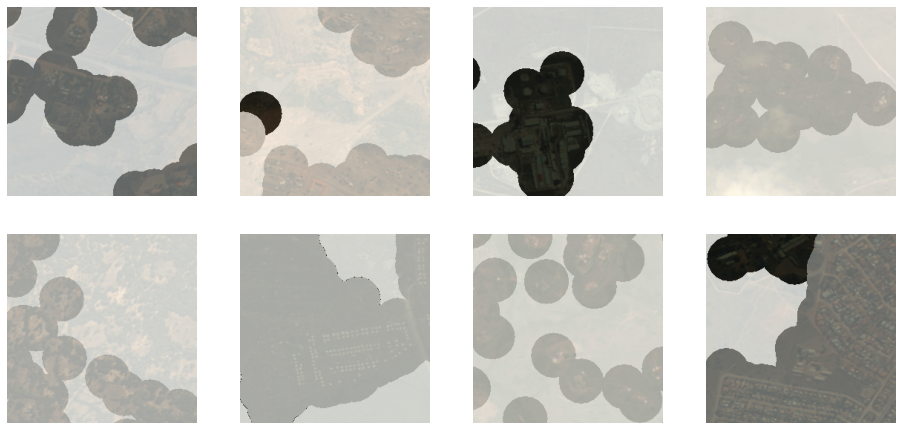

In [10]:

def show_batch(image_batch, mask_batch):
    plt.figure(figsize=(16, 16))
    for n in range(min(8,10)):
        ax = plt.subplot(4, 4, n + 1)
        plt.imshow(image_batch[n])
        plt.imshow(np.squeeze(mask_batch[n]), alpha=0.75)#, cmap='binary')
        plt.axis("off")

show_batch(image_batch.numpy(), mask_batch.numpy())

In [6]:
BATCH_SIZE

100

In [5]:
import json
from utils import config
path =os.path.join(config.data_dir,config.data_splits)
with open(path, 'r') as JSON:
    json_dict = json.load(JSON)
filenames =json_dict['EC'][1]
i=9

In [9]:
os.path.join(filenames[i].split('/')[0],config.image_dir, filenames[i].split('/')[1] )      

'KZN/images/2628A___14336_11264.png'

In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10326334724776209492
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 13811445834205868684
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15793166746
locality {
  bus_id: 1
  links {
    link {
      device_id: 1
      type: "StreamExecutor"
      strength: 1
    }
    link {
      device_id: 2
      type: "StreamExecutor"
      strength: 1
    }
    link {
      device_id: 3
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 6151978796230349185
physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:04.0, compute capability: 7.0"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 15793166746
locality {
  bus_id: 1
  links {
    link {
      type: "StreamExecutor"
      strength: 1
    }
    link {
      device_id: 2
      type: "Stre

In [ ]:
import os
import sys

import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from net import nn
from utils import config, util
from utils.dataset import input_fn

def model_n(prov):
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

    #Sets the threshold for what messages will be logged.
    tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

    np.random.seed(config.seed)
    tf.random.set_seed(config.seed)
    strategy = tf.distribute.MirroredStrategy()

    _, palette = util.get_label_info(os.path.join(config.data_dir, 'class_dict.csv'))

    import json
    path =os.path.join(config.data_dir,config.data_splits)
    with open(path, 'r') as JSON:
        json_dict = json.load(JSON)
    file_names =json_dict[prov][1]
    #file_names = [file_name[:-4] for file_name in os.listdir(os.path.join(config.data_dir, config.image_dir))]

    dataset = input_fn(file_names, palette)
    dataset = strategy.experimental_distribute_dataset(dataset)
    weights = util.get_class_weights(file_names)

    with strategy.scope():
        optimizer = tf.keras.optimizers.Adam(lr =0.0001)
        model = nn.build_model((config.height, config.width, 3), len(palette))
        model(tf.zeros((1, config.height, config.width, 3)))

    with strategy.scope():
        loss_fn = nn.segmentation_loss(weights)


        def compute_loss(y_true, y_pred):
            return tf.reduce_sum(loss_fn(y_true, y_pred)) * 1. / config.batch_size

    with strategy.scope():
        def train_step(image, y_true):
            with tf.GradientTape() as tape:
                y_pred = model(image)
                loss = compute_loss(y_true, y_pred)
            train_variable = model.trainable_variables
            gradient = tape.gradient(loss, train_variable)
            optimizer.apply_gradients(zip(gradient, train_variable))

            return loss

    with strategy.scope():
        @tf.function
        def distribute_train_step(image, y_true):
            loss = strategy.experimental_run_v2(train_step, args=(image, y_true))
            return strategy.reduce(tf.distribute.ReduceOp.SUM, loss, axis=None)



    steps = len(file_names) // config.batch_size
    if not os.path.exists('weights/collapsed'):
        os.makedirs('weights/collapsed')
    pb = tf.keras.utils.Progbar(steps, stateful_metrics=['loss',tf.keras.metrics.MeanIoU(num_classes=4)])
    for step, inputs in enumerate(dataset):
        if step % steps == 0:
            print(f'Epoch {step // steps + 1}/{config.epochs}')
            pb = tf.keras.utils.Progbar(steps, stateful_metrics=['loss',tf.keras.metrics.MeanIoU(num_classes=4)])
        step += 1
        image, y_true = inputs
        loss = distribute_train_step(image, y_true)
        pb.add(1, [('loss', loss)])
        if step % steps == 0:
            model.save_weights(os.path.join("weights","collapsed", prov+f"_model_v2.h5"))
        if step // steps == config.epochs:
            sys.exit("--- Stop Training ---")
    return prov+':---done'


def main():
    provinces =['EC','FS','GT','KZN','LIM','MP','NC','NW','WC']
    with multiprocessing.Pool(multiprocessing.cpu_count()) as pool:
        frequencies = pool.map(model_n, provinces)
    pool.close()
    
if __name__ == '__main__':
    main()


In [14]:
import json, multiprocessing
def calculate_class_weight(file_name):
    _, palette = util.get_label_info(os.path.join(config.data_dir, 'class_dict.csv'))
    label_to_frequency = {}
    for i, label in enumerate(palette):
        label_to_frequency[i] = 0

    image = util.load_label(file_name)
    for i, label in enumerate(palette):
        class_mask = (image == label)
        class_mask = np.all(class_mask, axis=2)
        class_mask = class_mask.astype(np.float32)
        class_frequency = np.sum(class_mask)
        label_to_frequency[i] += class_frequency
    return label_to_frequency



gt = {}
provinces =['EC','FS','GT','KZN','LIM','MP','NC','NW','WC']
for prov in provinces:

    path =os.path.join(config.data_dir,config.data_splits)
    with open(path, 'r') as JSON:
        json_dict = json.load(JSON)
    file_names =json_dict[prov][1] 

    with multiprocessing.Pool(multiprocessing.cpu_count()) as pool:
        frequencies = pool.map(calculate_class_weight, file_names)
    pool.close()
    _, palette = util.get_label_info(os.path.join(config.data_dir, 'class_dict.csv'))
    label_to_frequency = {}
    for i, label in enumerate(palette):
        label_to_frequency[i] = 0

    for frequency in frequencies:
        label_to_frequency[0] += frequency[0]
        label_to_frequency[1] += frequency[1]
        label_to_frequency[2] += frequency[2]
        label_to_frequency[3] += frequency[3]
        
    class_weights = []
    total_frequency = sum(label_to_frequency.values())
    for label, frequency in label_to_frequency.items():
        class_weight = 1 / np.log(1.02 + (frequency / total_frequency))
        class_weights.append(class_weight)
    #class_weights = np.array(class_weights, np.float32)
    

    gt[prov] =class_weights
    
with open('data_.json', 'w') as fp:
    json.dump(gt, fp)


Process ForkPoolWorker-529:
Process ForkPoolWorker-545:
Process ForkPoolWorker-535:
Process ForkPoolWorker-544:
Process ForkPoolWorker-541:
Process ForkPoolWorker-551:
Process ForkPoolWorker-542:
Process ForkPoolWorker-538:
Process ForkPoolWorker-531:
Process ForkPoolWorker-540:
Process ForkPoolWorker-534:
Process ForkPoolWorker-530:
Process ForkPoolWorker-533:
Process ForkPoolWorker-546:
Process ForkPoolWorker-539:
Process ForkPoolWorker-537:
Process ForkPoolWorker-552:
Process ForkPoolWorker-543:
Process ForkPoolWorker-536:
Traceback (most recent call last):
Process ForkPoolWorker-532:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/purco/anaconda3/envs/tf_gpu/lib/python3.6/multiprocessing/process.py", line 

  File "/home/purco/anaconda3/envs/tf_gpu/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/purco/anaconda3/envs/tf_gpu/lib/python3.6/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/home/purco/anaconda3/envs/tf_gpu/lib/python3.6/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "<ipython-input-14-050b54217804>", line 10, in calculate_class_weight
    class_mask = (image == label)
  File "<ipython-input-14-050b54217804>", line 10, in calculate_class_weight
    class_mask = (image == label)
  File "<ipython-input-14-050b54217804>", line 10, in calculate_class_weight
    class_mask = (image == label)
  File "/home/purco/anaconda3/envs/tf_gpu/lib/python3.6/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "<ipython-input-14-050b54217804>", line 10, in calculate_class_weight
    class_mask = (image == label)
  File "/home/purco/ana

  File "/home/purco/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/numpy/core/fromnumeric.py", line 2398, in all
    return _wrapreduction(a, np.logical_and, 'all', axis, None, out, keepdims=keepdims)
  File "/home/purco/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/numpy/core/fromnumeric.py", line 90, in _wrapreduction
    return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
  File "/home/purco/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/numpy/core/fromnumeric.py", line 90, in _wrapreduction
    return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
Process ForkPoolWorker-548:
Process ForkPoolWorker-550:
Process ForkPoolWorker-549:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/purco/anaconda3/envs/tf_gpu/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/purco/anaconda3/envs/tf_gpu/lib/python3.6/multiprocessing/process.py", line 25

KeyboardInterrupt: 

In [16]:
with open('data_.json', 'w') as fp:
    json.dump(gt, fp)

In [17]:
with open('data_.json', 'r') as JSON:
    json_dict_ = json.load(JSON)
weights = np.array(json_dict_['prov'], np.float32)

KeyError: 'GT'

In [ ]:
x = tf.random.uniform([3, 3])

print("Is there a GPU available: "),
print(tf.test.is_gpu_available())

print("Is the Tensor on GPU #0:  "),
print(x.device.endswith('GPU:0'))

print("Device name: {}".format((x.device)))

In [4]:
import os
folder_dst = 'ppsk.png'

os.path.basename(folder_dst)[:-4]

'ppsk.png'

In [27]:
import shutil
total = 0
data_img =[]
data_msk =[]
sub_folders = ['val', 'test', 'train']
provinces =['EC','FS','GT','KZN','LIM','MP','NC','NW','WC']
folder_dst = '/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/'
folder_src = '/spatial/data/exp/data_final_set_for_model/data/training/final_data/'

for province in provinces:
    arr_frames= []
    arr_masks= []
    for sub_folder in sub_folders:
        base_folder =folder_src+'province_' + province +'/'
        folder = base_folder+ sub_folder+'_frames/'+ sub_folder +'/'
        for root, dirs, files in os.walk(folder):
            #print(dirs)
            for i in files:
                if i.endswith(".png"):
                    if os.path.isfile(folder+i) and os.path.isfile(folder.replace('frames','masks')+i):
                        arr_frames.append( [sub_folder+'_frames/'+sub_folder+'/'+i,i])
                        arr_masks.append([sub_folder+'_masks/'+sub_folder+'/'+i,i])

    
    for j in range(len(arr_masks)):
        #images
        src_img = base_folder+arr_frames[j][0]
        dst_img = folder_dst+province+'/images/'+arr_frames[j][1]
        shutil.copy(src_img, dst_img)
        
        #masks
        src_msk = base_folder+arr_masks[j][0]
        dst_msk = folder_dst+province+'/masks/'+arr_masks[j][1]
        shutil.copy(src_msk, dst_msk)
        
        data_img.append([province, arr_frames[j][1]])
        data_msk.append([province, arr_masks[j][1]])
        
len(data)        

3475

In [24]:
import os
masks =[]
provinces =['EC','FS','GT','KZN','LIM','MP','NC','NW','WC']
for prov in provinces:
    
    for path, subdirs, files in os.walk(folder_dst+prov+'/masks/'):
        for name in files:
            if name.endswith('png'):
                masks.append(prov+'/'+ name)
                #print os.path.join(path, name)


mask =[]

for prov in provinces:
    
    for path, subdirs, files in os.walk(folder_dst+prov+'/collapsed/'):
        for name in files:
            if name.endswith('png'):
                mask.append(prov+'/'+ name)
                #print os.path.join(path, name)
                
fin_masks=list(set(masks)-set(mask))

In [31]:
len(mask)

1869840

In [22]:
len(fin_masks)

65569

In [26]:
import os
import multiprocessing
from PIL import Image
from utils import util
folder_dst = '/spatial/data/neurips_data/'
_, palette = util.get_label_info(folder_dst+'class_dict.csv')

new_ =[[(201,201,201)],
 [(7,7,7)],
 [(124,124,124)],
 [(124,124,124)],
 [(7,7,7)],
 [(201,201,201)],
 [(7,7,7)],
 [(124,124,124)],
 [(201,201,201)],
 [(7,7,7)],
 [(201,201,201)],
 [(255,255,255)]]

ind ={}
for i in range(len(palette)):
    ind[tuple(palette[i])] =tuple(new_[i])
    
ind[(255, 64, 255)] =((7, 7, 7),)
ind[(255, 16, 255)] =((7, 7, 7),)
ind[(223, 255, 223)] =((255,255,255),)
ind[(223, 255, 255)] =((255,255,255),)
ind[(255, 223, 255)] =((255,255,255),)
ind[(255, 255, 223)] =((255,255,255),)

##Create collapsed masks

provinces =['EC','FS','GT','KZN','LIM','MP','NC','NW','WC']
provinces.reverse()
masks =[]
for prov in provinces:
    if not os.path.exists(folder_dst+prov+'/collapsed'):
        os.makedirs(folder_dst+prov+'/collapsed')
    for path, subdirs, files in os.walk(folder_dst+prov+'/masks/'):
        for name in files:
            if name.endswith('png'):
                masks.append(prov+'/'+ name)
                #print os.path.join(path, name)

In [28]:
def change_pixel(file_name):
    other =[]
    #if not os.path.exists(folder_dst+file_name.split('/')[0]+'/masks/'+file_name.split('/')[1]):
    im=Image.open(folder_dst+file_name.split('/')[0]+'/masks/'+file_name.split('/')[1])
    pix=im.load()
    #print(im)
    for i_ in range(256):
        for j_ in range(256):
            if pix[i_,j_] in ind:
                im.putpixel((i_,j_),(ind[pix[i_,j_]][0] ))


            else:
                print(pix[i_,j_])
                other.append([file_name,pix[i_,j_]])

    im.save(folder_dst+file_name.split('/')[0]+'/collapsed/'+file_name.split('/')[1])

    return other

with multiprocessing.Pool(multiprocessing.cpu_count()) as pool:
    frequencies = pool.map(change_pixel, fin_masks)
pool.close()

In [30]:
frequencies

[]

In [30]:
import csv

with open(folder_dst+ 'folder_files.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(['province', 'file_name'])
    writer.writerows(data_msk)

In [15]:
masks =[]
for prov in provinces:
    if not os.path.exists(folder_dst+prov+'/collapsed'):
        os.makedirs(folder_dst+prov+'/collapsed')
        
    for path, subdirs, files in os.walk(folder_dst+prov+'/collapsed/'):
        for name in files:
            if name.endswith('png'):
                masks.append(prov+'/'+ name)
                #print os.path.join(path, name)

In [11]:
len(masks)

1869840

In [14]:
1869840-len(masks)

66864

In [26]:
import os

for parent, dirnames, filenames in os.walk(folder_dst):
    for fn in filenames:
        if fn.lower().endswith('.png'):
            os.remove(os.path.join(parent, fn))

In [14]:
folder.replace('frames','masks')+'/'+i

'/spatial/data/exp/data_final_set_for_model_2/data/training/final_data/province_EC/train_masks/train/2628A___19712_9728.png'

In [1]:
import numpy as np
import tensorflow as tf
import os,json
from net import nn
from utils import config, util
from utils.dataset import input_fn

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

#Sets the threshold for what messages will be logged.
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

np.random.seed(config.seed)
tf.random.set_seed(config.seed)
strategy = tf.distribute.MirroredStrategy()

_, palette = util.get_label_info(os.path.join(config.data_dir, 'class_dict.csv'))
import json
path =os.path.join(config.data_dir,config.data_splits)
with open(path, 'r') as JSON:
    json_dict = json.load(JSON)
file_names =json_dict['EC'][1]

#file_names = [file_name[:-4] for file_name in os.listdir(os.path.join(config.data_dir, config.image_dir))]

dataset = input_fn(file_names[], palette)

In [3]:
for x, y in dataset:
    print(x, y)

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831B___12032_8192.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527D___19712_11776.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527D___19712_11776.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831B___12032_8192.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2732A___12544_5120.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2732A___12544_5120.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528A___3584_19200.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2627B___15872_8960.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528A___3584_19200.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_d

   [0.31764707 0.29803923 0.21960784]]]], shape=(32, 256, 256, 3), dtype=float32) tf.Tensor(
[[[[0.3529412  0.34901962 0.24313726]
   [0.3529412  0.34509805 0.23921569]
   [0.3647059  0.3529412  0.24313726]
   ...
   [0.01568628 0.7137255  0.41960785]
   [0.04313726 0.8        0.47843137]
   [0.04313726 0.81960785 0.49411765]]

  [[0.3764706  0.36078432 0.24705882]
   [0.3529412  0.34901962 0.24313726]
   [0.36862746 0.3529412  0.24313726]
   ...
   [0.80784315 0.5803922  0.36078432]
   [0.95686275 0.654902   0.39607844]
   [0.972549   0.65882355 0.4       ]]

  [[0.3764706  0.36078432 0.24705882]
   [0.36862746 0.35686275 0.24705882]
   [0.4117647  0.3764706  0.2627451 ]
   ...
   [0.5294118  0.43529412 0.29411766]
   [0.6392157  0.49411765 0.31764707]
   [0.61960787 0.48235294 0.31764707]]

  ...

  [[0.6666667  0.52156866 0.32941177]
   [0.654902   0.5176471  0.32156864]
   [0.6666667  0.5176471  0.32156864]
   ...
   [0.6901961  0.5411765  0.3372549 ]
   [0.7058824  0.5529412  0.34

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2628A___4864_11776.png
tf.Tensor(
[[[[0. 0. 0. ... 0. 0. 1.]
   [0. 0. 0. ... 0. 0. 1.]
   [0. 0. 0. ... 0. 0. 1.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 1.]
   [0. 0. 0. ... 0. 0. 1.]
   [0. 0. 0. ... 0. 0. 1.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 1.]
   [0. 0. 0. ... 0. 0. 1.]
   [0. 0. 0. ... 0. 0. 1.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  ...

  [[0. 0. 0. ... 0. 0. 1.]
   [0. 0. 0. ... 0. 0. 1.]
   [0. 0. 0. ... 0. 0. 1.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 1.]
   [0. 0. 0. ... 0. 0. 1.]
   [0. 0. 0. ... 0. 0. 1.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 1

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831D___1280_13568.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831D___1280_13568.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930B___21248_18944.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2930B___21248_18944.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2627B___6912_13568.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2627B___6912_13568.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2628A___4864_11776.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930D___20992_11264.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2628A___4864_11776.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528C___15104_20480.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527C___12032_4096.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527C___12032_4096.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528C___15104_20480.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527C___11008_6400.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527C___11008_6400.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831B___15616_6400.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/3030B___12288_6656.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831B___15616_6400.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_d

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2427C___17664_3840.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2627B___8192_11008.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2427C___17664_3840.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2627B___8192_11008.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2830B___18176_18432.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2830B___18176_18432.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527B___18688_12032.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528C___13568_4864.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528C___13568_4864.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2627B___18176_5888.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528C___13568_4864.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2627B___18176_5888.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528C___13568_4864.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930D___18688_19968.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2930D___18688_19968.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930B___14592_18432.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2628A___9472_15616.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2930B___14592_18432.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2628A___9216_15104.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/3030B___12288_6656.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/3030B___12288_6656.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2628A___9216_15104.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2830B___19200_11008.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2830B___19200_11008.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2931C___2304_11776.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930D___16384_15104.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2931C___2304_11776.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527D___15104_12800.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528C___8704_1280.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528C___8704_1280.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527D___15104_12800.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2627B___18176_5888.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2627B___18176_5888.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528C___13568_4864.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528C___16640_9472.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528C___13568_4864.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_dat

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831B___256_21248.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2627B___18176_5888.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2627B___18176_5888.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831B___256_21248.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2628A___5376_3328.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2628A___5376_3328.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2628A___9216_2048.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2731A___17664_14336.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2628A___9216_2048.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2628A___14336_11264.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2628A___14336_11264.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/3030B___12288_6656.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/3030B___12288_6656.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2628A___5376_3328.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2628A___5376_3328.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930D___16640_20736.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2930D___16640_20736.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831B___18944_1024.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_d

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930B___21248_18944.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527B___19200_18944.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527B___19200_18944.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2930B___21248_18944.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527B___12800_13824.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527B___12800_13824.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2830B___18176_18432.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930D___18688_19968.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2830B___18176_18432.png
/spatial/data/exp/data_final_set_for_model/data/training/ne

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930D___17408_16128.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527C___10752_1280.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2930D___17408_16128.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527C___10752_1280.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527B___14592_20224.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527B___14592_20224.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831B___15616_6400.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528A___3584_19200.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831B___15616_6400.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930D___20992_11264.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2930D___20992_11264.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930D___18688_19968.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2930D___18688_19968.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2627B___13056_6656.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2627B___13056_6656.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528C___13568_4864.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528C___13568_4864.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527C___10752_3584.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831B___8704_2304.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527D___19712_11776.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831B___8704_2304.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527D___19712_11776.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528C___1792_9472.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528C___1792_9472.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831D___1280_13568.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831D___1280_13568.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527D___16640_15872.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527D___16640_15872.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2830B___19200_11008.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527D___16640_15872.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2830B___19200_11008.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930D___16640_20736.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2930D___16640_20736.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930B___14592_18432.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831D___17408_16896.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831D___17408_16896.png
/spatial/data/exp/data_final_set_for_model/data/training/ne

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2627B___6656_6912.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527D___19712_11776.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2627B___6656_6912.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527D___19712_11776.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831D___16640_11264.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831D___16640_11264.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2931A___14848_5120.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930D___20992_11264.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2931A___14848_5120.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930D___20992_11264.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2930D___20992_11264.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2732A___18432_9728.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2732A___18432_9728.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2529C___13568_20224.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2529C___13568_20224.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930B___20992_14080.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2628A___14336_11264.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2930B___20992_14080.png
/spatial/data/exp/data_final_set_for_model/data/training/neur

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2628A___4096_13824.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527D___16640_15872.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527D___16640_15872.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2628A___4096_13824.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930D___17664_13824.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2930D___17664_13824.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2732A___9984_4608.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527D___15104_12800.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2732A___9984_4608.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528A___3584_19200.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2529C___13568_20224.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2529C___13568_20224.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528A___3584_19200.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2931C___2816_9984.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2931C___2816_9984.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831B___8704_2304.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528C___12032_12032.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831B___8704_2304.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2732A___18432_9728.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831D___14336_15872.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2732A___18432_9728.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831D___14336_15872.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831B___20992_17664.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831B___20992_17664.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831D___1280_13568.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831D___1280_13568.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527D___7936_8704.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/3030B___13568_3584.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2732A___9984_4608.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/3030B___13568_3584.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2732A___9984_4608.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527B___14592_20224.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527B___14592_20224.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930D___15872_20224.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2931A___15104_1024.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2931A___15104_1024.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_da

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2628A___4096_13824.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2628A___4096_13824.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527C___11008_6400.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527C___11008_6400.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831D___16640_11264.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831D___16640_11264.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2830B___19968_19968.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528C___1792_9472.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528C___1792_9472.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_da

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528A___12288_17408.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528A___12288_17408.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2628A___4864_11776.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2628A___4864_11776.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831D___14336_15872.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831D___14336_15872.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527C___11008_6400.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930B___19712_14080.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527C___11008_6400.png
/spatial/data/exp/data_final_set_for_model/data/training/neurip

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2627B___16640_6912.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831B___15616_6400.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2627B___16640_6912.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831B___15616_6400.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2931C___2304_11776.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2931C___2304_11776.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2529C___14592_19968.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527A___7936_21248.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527A___7936_21248.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_da

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527D___7936_8704.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527D___7936_8704.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2830B___19968_19968.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2830B___19968_19968.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2529C___13568_20224.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2529C___13568_20224.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/3030B___13568_3584.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/3030B___13568_3584.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528C___15104_20480.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2732A___18432_9728.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2732A___18432_9728.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2627B___15872_8960.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2627B___15872_8960.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831B___8704_2304.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831B___8704_2304.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2628A___13568_7168.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2628A___13568_7168.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831B___256_21248.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/K

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528A___12288_17408.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528C___12032_12032.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528C___12032_12032.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528A___12288_17408.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2830B___19200_11008.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2830B___19200_11008.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2627B___18176_5888.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527A___18944_6400.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527A___18944_6400.png
/spatial/data/exp/data_final_set_for_model/data/training/neuri

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527B___12800_13824.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527D___19712_11776.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527B___12800_13824.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527D___19712_11776.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2529C___14592_19968.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2529C___14592_19968.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831B___12032_8192.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831B___12032_8192.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831D___16640_11264.png
/spatial/data/exp/data_final_set_for_model/data/training/neur

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930B___19712_14080.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2526C___3072_2048.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2526C___3072_2048.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2930B___19712_14080.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2627B___15872_8960.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2627B___15872_8960.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831D___14336_15872.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831D___14336_15872.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930B___20992_14080.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2427C___17664_3840.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2427C___17664_3840.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831D___2304_7168.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831D___2304_7168.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528A___3584_19200.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528A___3584_19200.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527D___16640_15872.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527D___16640_15872.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527B___19200_18944.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_da

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831D___10752_17664.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2732A___12544_5120.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2732A___12544_5120.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831D___10752_17664.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528A___12288_17408.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528A___12288_17408.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528C___5376_9984.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527C___9728_5888.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527C___9728_5888.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_da

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2627B___18176_5888.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528C___8704_1280.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528C___8704_1280.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2627B___18176_5888.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527B___14592_20224.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527B___14592_20224.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930D___13824_9216.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2930D___13824_9216.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2830B___18176_18432.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_da

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528C___12032_12032.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2830B___18176_18432.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528C___12032_12032.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2830B___18176_18432.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2627B___16128_10752.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2627B___16128_10752.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527A___7936_21248.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527A___7936_21248.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2627B___16128_10752.png
/spatial/data/exp/data_final_set_for_model/data/training/neur

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930D___16640_20736.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831B___12032_8192.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2930D___16640_20736.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831B___12032_8192.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2830B___18176_18432.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2830B___18176_18432.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527B___19200_18944.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/3030B___12288_6656.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527B___19200_18944.png
/spatial/data/exp/data_final_set_for_model/data/training/neuri

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831D___13824_10752.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831D___13824_10752.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528A___12288_17408.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528A___12288_17408.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527C___10752_1280.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527C___10752_1280.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2627B___6912_13568.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2627B___6912_13568.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930D___16384_15104.png
/spatial/data/exp/data_final_set_for_model/data/training/neurip

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528C___12032_12032.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831D___17408_16896.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528C___12032_12032.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831D___17408_16896.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527C___11008_6400.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527C___11008_6400.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831B___256_21248.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831B___256_21248.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2931A___14848_5120.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_d

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2732A___9984_4608.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2732A___9984_4608.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930D___18688_19968.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2930D___18688_19968.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930D___17664_13824.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2930D___17664_13824.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2627B___6656_6912.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2627B___6656_6912.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930D___18688_19968.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_da

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2732A___12544_5120.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2732A___9984_4608.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2732A___9984_4608.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2732A___12544_5120.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831B___18944_1024.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831B___18944_1024.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2628A___17408_11264.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2628A___17408_11264.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831D___2304_7168.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527C___13568_12032.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527C___13568_12032.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528C___13568_4864.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528C___13568_4864.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2930D___16640_20736.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2930D___16640_20736.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2628A___9216_15104.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2628A___9216_15104.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2628A___5376_3328.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2628A___4096_13824.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527D___16384_4096.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2628A___4096_13824.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2527D___16384_4096.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528C___12032_1024.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528C___12032_1024.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2528C___12032_1024.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2528C___12032_1024.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2527D___16384_4096.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_dat

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2832A___5888_16640.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831B___20992_17664.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2832A___5888_16640.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831B___20992_17664.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2830B___19968_19968.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2830B___19968_19968.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831D___16640_17152.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831D___16640_17152.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2830B___19200_11008.png
/spatial/data/exp/data_final_set_for_model/data/training/neur

Process Keras_worker_ForkPoolWorker-839:
Process Keras_worker_ForkPoolWorker-840:
Traceback (most recent call last):
  File "/home/purco/anaconda3/envs/tf_gpu/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/purco/anaconda3/envs/tf_gpu/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/purco/anaconda3/envs/tf_gpu/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/purco/anaconda3/envs/tf_gpu/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/purco/anaconda3/envs/tf_gpu/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
Traceback (most recent call last):
  File "/home/purco/anaconda3/envs/tf_gpu/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/purco/anaconda3/envs/tf_gpu/lib

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2526C___3072_2048.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831B___20992_17664.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831B___20992_17664.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2526C___3072_2048.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831B___18944_1024.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2831B___18944_1024.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2627B___8192_11008.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2831D___16640_17152.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2627B___8192_11008.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_da

KeyboardInterrupt: 

/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2930D___16640_20736.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2930B___14592_18432.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/images/2529C___14592_19968.png
/spatial/data/exp/data_final_set_for_model/data/training/neurips_data/KZN/masks/2529C___14592_19968.png


In [11]:
import json

with open(path, 'r') as JSON:
    json_dict = json.load(JSON)
file_names =json_dict['EC'][1]

In [3]:
path =os.path.join(config.data_dir,config.data_splits)

In [3]:
import os,json
json_data = json.loads(os.path.join(config.data_dir,config.data_splits))[0]

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [2]:
def input_fn(file_names, palette):
    def generator_fn():
        generator = utils.OrderedEnqueuer(Generator(file_names, palette), True)
        generator.start(workers=os.cpu_count() - 2)
        while True:
            image, label = generator.get().__next__()
            yield image, label

    dataset = tf.data.Dataset.from_generator(generator_fn,
                                             (tf.float32, tf.float32),
                                             (tf.TensorShape([config.height, config.width, 3]),
                                              tf.TensorShape([config.height, config.width, len(palette)])))

    dataset = dataset.batch(config.batch_size)
    dataset = dataset.repeat(config.epochs)
    dataset = dataset.prefetch(10 * config.batch_size)
    return dataset

['2628D___14848_17920',
 '2627D___7424_8704',
 '2527D___16384_4096',
 '2527B___13312_8448',
 '2529C___1280_19968',
 '2529C___12800_18688',
 '2628D___19712_5376',
 '2627B___13312_20992',
 '2627B___11008_9728',
 '2527C___7168_14592',
 '2629A___6400_7168',
 '2528C___12032_1024',
 '2529A___6656_16640',
 '2627D___8192_3328',
 '2528C___15360_18432',
 '2528B___11008_11776',
 '2627B___3584_13312',
 '2527B___4352_13312',
 '2628B___2304_19456',
 '2628A___5376_3328',
 '2528D___14592_15360',
 '2627B___16128_10752',
 '2627C___6912_5120',
 '2628B___4096_9216',
 '2528B___11008_15360',
 '2629A___1024_8192',
 '2529A___15872_15872',
 '2528C___7168_20480',
 '2527D___16640_15872',
 '2627D___9984_14848',
 '2628D___6912_4096',
 '2527B___13056_20480',
 '2627C___9216_000',
 '2527C___18176_8192',
 '2527D___8192_1792',
 '2528C___5376_9984',
 '2527B___16640_15616',
 '2528B___10496_7680',
 '2628A___12800_18176',
 '2627C___16640_7424',
 '2529C___12288_3072',
 '2527B___11264_15360',
 '2528B___3328_18432',
 '2627B__

In [3]:
provinces =['EC','FS','GT','KZN','LIM','MP','NC','NW','WC']
folder_dst = '/spatial/data/exp/data_final_set_for_model_2/data/training/neurips_data'
folder_src = '/spatial/data/exp/data_final_set_for_model_2/data/training/final_data/'
for province in provinces:
    

525134

In [ ]:
for prov in provinces:
    for root_, dirs, files__ in os.walk(class_12 + prov):
            for q in files__:
                if q.endswith(".png"):

In [33]:
np.random.seed(config.seed)
tf.random.set_seed(config.seed)
strategy = tf.distribute.MirroredStrategy()

_, palette = util.get_label_info(os.path.join(config.data_dir, 'class_dict.csv'))

In [34]:
palette

[[255, 255, 255], [124, 124, 124], [201, 201, 201], [7, 7, 7]]

In [37]:
file_names = [file_name[:-4] for file_name in os.listdir(os.path.join(config.data_dir, config.image_dir))]

In [38]:
file_names= file_names[:100]

In [17]:
file_names =['2628D___14848_17920',
 '2627D___7424_8704',
 '2527D___16384_4096',
 '2527B___13312_8448',
 '2529C___1280_19968',
 '2529C___12800_18688',
 '2628D___19712_5376',
 '2627B___13312_20992',
 '2627B___11008_9728',
 '2527C___7168_14592',
 '2629A___6400_7168',
 '2528C___12032_1024',
 '2529A___6656_16640',
 '2627D___8192_3328',
 '2528C___15360_18432',
 '2528B___11008_11776',
 '2627B___3584_13312',
 '2527B___4352_13312',
 '2628B___2304_19456',
 '2628A___5376_3328',
 '2528D___14592_15360',
 '2627B___16128_10752',
 '2627C___6912_5120',
 '2628B___4096_9216',
 '2528B___11008_15360',
 '2629A___1024_8192',
 '2529A___15872_15872',
 '2528C___7168_20480',
 '2527D___16640_15872',
 '2627D___9984_14848',
 '2628D___6912_4096',
 '2527B___13056_20480',
 '2627C___9216_000',
 '2527C___18176_8192',
 '2527D___8192_1792',
 '2528C___5376_9984',
 '2527B___16640_15616',
 '2528B___10496_7680',
 '2628A___12800_18176',
 '2627C___16640_7424',
 '2529C___12288_3072',
 '2527B___11264_15360',
 '2528B___3328_18432',
 '2627B___3840_7424',
 '2528A___19712_12800',
 '2627A___3840_11520',
 '2527B___11520_9472',
 '2629C___13568_11264',
 '2627A___16128_19968',
 '2628B___9216_5888',
 '2627C___17664_16128',
 '2627D___14080_4352',
 '2629A___13312_1536',
 '2628C___17408_1792',
 '2529A___16896_3840',
 '2528D___12032_14592',
 '2627C___16384_7168',
 '2529A___13056_16128',
 '2527C___11008_6400',
 '2627B___15872_8960',
 '2627C___16384_13056',
 '2528A___5632_000',
 '2627A___9472_19456',
 '2527C___7424_15360',
 '2628A___9216_2048',
 '2529A___13056_19456',
 '2627D___1536_2304',
 '2628D___6144_9728',
 '2527D___20224_7936',
 '2527C___20992_19456',
 '2529C___13568_20224',
 '2529C___16128_512',
 '2527D___9728_8704',
 '2627B___11008_18944',
 '2628C___4352_3328',
 '2528B___5376_7168',
 '2529A___17408_1024',
 '2527D___6144_19968',
 '2529A___20480_256',
 '2629A___17152_13056',
 '2527C___13568_10752',
 '2628B___9984_9216',
 '2629C___12800_14848',
 '2627A___9472_5888',
 '2529A___6912_13824',
 '2527C___9984_9472',
 '2627D___6144_6144',
 '2527C___18688_5376',
 '2629C___18432_8704',
 '2629C___10240_16384',
 '2627B___16128_1024',
 '2627A___512_18176',
 '2527A___000_512',
 '2629A___5632_2560',
 '2527A___3328_17408',
 '2627A___768_4096',
 '2627C___15616_16128',
 '2529A___20480_2816',
 '2627B___1024_7680',
 '2628D___10752_16384']

In [7]:
_, palette = util.get_label_info(os.path.join(config.data_dir, 'class_dict.csv'))
label_to_frequency = {}
for i, label in enumerate(palette):
    label_to_frequency[i] = 0

In [3]:
import csv
import multiprocessing
import os
import random

import cv2
import numpy as np

from utils import config,util

In [41]:
with multiprocessing.Pool(multiprocessing.cpu_count()) as pool:
    frequencies = pool.map(util.calculate_class_weight, file_names)
pool.close()

error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'


In [4]:
_, palette = util.get_label_info(os.path.join(config.data_dir, 'class_dict.csv'))
label_to_frequency = {}
for i, label in enumerate(palette):
    label_to_frequency[i] = 0

In [16]:
frequencies

[{0: 65536.0, 1: 0.0},
 {0: 28604.0, 1: 36922.0},
 {0: 65536.0, 1: 0.0},
 {0: 65536.0, 1: 0.0},
 {0: 29552.0, 1: 35984.0},
 {0: 16556.0, 1: 48969.0},
 {0: 65536.0, 1: 0.0},
 {0: 65536.0, 1: 0.0},
 {0: 65536.0, 1: 0.0},
 {0: 65536.0, 1: 0.0},
 {0: 55886.0, 1: 9650.0},
 {0: 19153.0, 1: 46378.0},
 {0: 28440.0, 1: 37096.0},
 {0: 28928.0, 1: 36608.0},
 {0: 9292.0, 1: 56244.0},
 {0: 19785.0, 1: 45751.0},
 {0: 17624.0, 1: 47910.0},
 {0: 65536.0, 1: 0.0},
 {0: 24385.0, 1: 41148.0},
 {0: 60700.0, 1: 4836.0},
 {0: 65536.0, 1: 0.0},
 {0: 65536.0, 1: 0.0},
 {0: 15998.0, 1: 49538.0},
 {0: 65536.0, 1: 0.0},
 {0: 65536.0, 1: 0.0},
 {0: 65536.0, 1: 0.0},
 {0: 10696.0, 1: 54840.0},
 {0: 65536.0, 1: 0.0},
 {0: 26589.0, 1: 38931.0},
 {0: 65536.0, 1: 0.0},
 {0: 65536.0, 1: 0.0},
 {0: 44989.0, 1: 20547.0},
 {0: 24053.0, 1: 41470.0},
 {0: 11979.0, 1: 53557.0},
 {0: 62787.0, 1: 2749.0},
 {0: 65536.0, 1: 0.0},
 {0: 23851.0, 1: 41685.0},
 {0: 20903.0, 1: 44633.0},
 {0: 63227.0, 1: 2309.0},
 {0: 65536.0, 1: 0.0

In [17]:
for frequency in frequencies:
    label_to_frequency[0] += frequency[0]
    label_to_frequency[1] += frequency[1]
    label_to_frequency[2] += frequency[2]
    label_to_frequency[3] += frequency[3]

In [40]:
with multiprocessing.Pool(multiprocessing.cpu_count()) as pool:
    frequencies = pool.map(calculate_class_weight, file_names)
pool.close()
_, palette = get_label_info(os.path.join(config.data_dir, 'class_dict.csv'))
label_to_frequency = {}
for i, label in enumerate(palette):
    label_to_frequency[i] = 0

for frequency in frequencies:
    label_to_frequency[0] += frequency[0]
    label_to_frequency[1] += frequency[1]
    label_to_frequency[2] += frequency[2]
    label_to_frequency[3] += frequency[3]

NameError: name 'multiprocessing' is not defined

In [7]:
file_name =file_names[0]
_, palette = util.get_label_info(os.path.join(config.data_dir, 'class_dict.csv'))
label_to_frequency = {}
for i, label in enumerate(palette):
    label_to_frequency[i] = 0

In [11]:
path = './Dataset/buildings/train_labels/2628D___14848_17920.png'

In [12]:
image = cv2.cvtColor(cv2.imread(path, -1), cv2.COLOR_BGR2RGB)

In [10]:
path

'./Dataset/buildings/test_labels/2628D___14848_17920.png'

In [13]:
for i, label in enumerate(palette):
    class_mask = (image == label)
    class_mask = np.all(class_mask, axis=2)
    class_mask = class_mask.astype(np.float32)
    class_frequency = np.sum(class_mask)
    label_to_frequency[i] += class_frequency

In [16]:
label_to_frequency

{0: 65536.0, 1: 0.0, 2: 0.0, 3: 0.0}

In [36]:
def load_label(file_name):

    path = os.path.join(config.data_dir, config.label_dir, file_name + '.png')
    #print(path)
    return cv2.cvtColor(cv2.imread(path, -1), cv2.COLOR_BGR2RGB)

def calculate_class_weight(prov, file_name):
    _, palette = get_label_info(os.path.join(config.data_dir, 'class_dict.csv'))
    label_to_frequency = {}
    label_to_frequency['file_name'] = file_name
    for i, label in enumerate(palette):
        label_to_frequency[i] = 0

    image = load_label(file_name)
    for i, label in enumerate(palette):
        class_mask = (image == label)
        class_mask = np.all(class_mask, axis=2)
        class_mask = class_mask.astype(np.float32)
        class_frequency = np.sum(class_mask)
        label_to_frequency[i] += class_frequency
    return label_to_frequency

def get_label_info(csv_path):
    class_names = []
    label_values = []
    with open(csv_path, 'r') as reader:
        file_reader = csv.reader(reader, delimiter=',')
        next(file_reader)
        for row in file_reader:
            class_names.append(row[0])
            label_values.append([int(row[1]), int(row[2]), int(row[3])])
            #print(row[0])
    return class_names, label_values

def get_class_weights(file_names):
    with multiprocessing.Pool(multiprocessing.cpu_count()) as pool:
        frequencies = pool.map(calculate_class_weight, file_names)
    pool.close()
 
with multiprocessing.Pool(multiprocessing.cpu_count()) as pool:
    frequencies = pool.starmap(calculate_class_weight, zip('NW',file_names))
pool.close()

import csv

toCSV = frequencies
keys = toCSV[0].keys()
with open('tmp.csv', 'w', newline='')  as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(toCSV)

In [38]:
frequencies

[{'file_name': '2628D___14848_17920', 0: 65536.0, 1: 0.0, 2: 0.0, 3: 0.0},
 {'file_name': '2627D___7424_8704', 0: 60017.0, 1: 5519.0, 2: 0.0, 3: 0.0},
 {'file_name': '2527D___16384_4096',
  0: 13000.0,
  1: 44519.0,
  2: 0.0,
  3: 8017.0},
 {'file_name': '2527B___13312_8448', 0: 65534.0, 1: 0.0, 2: 2.0, 3: 0.0},
 {'file_name': '2529C___1280_19968', 0: 65536.0, 1: 0.0, 2: 0.0, 3: 0.0},
 {'file_name': '2529C___12800_18688', 0: 62306.0, 1: 3230.0, 2: 0.0, 3: 0.0},
 {'file_name': '2628D___19712_5376', 0: 65536.0, 1: 0.0, 2: 0.0, 3: 0.0},
 {'file_name': '2627B___13312_20992', 0: 65536.0, 1: 0.0, 2: 0.0, 3: 0.0},
 {'file_name': '2627B___11008_9728', 0: 65536.0, 1: 0.0, 2: 0.0, 3: 0.0},
 {'file_name': '2527C___7168_14592', 0: 55176.0, 1: 10360.0, 2: 0.0, 3: 0.0},
 {'file_name': '2629A___6400_7168', 0: 65536.0, 1: 0.0, 2: 0.0, 3: 0.0},
 {'file_name': '2528C___12032_1024', 0: 44555.0, 1: 20981.0, 2: 0.0, 3: 0.0},
 {'file_name': '2529A___6656_16640', 0: 65536.0, 1: 0.0, 2: 0.0, 3: 0.0},
 {'file_

In [ ]:
get_class_weights(prov, file_names):
util.get_class_weights(file_names)

In [39]:
import csv
toCSV = frequencies
keys = toCSV[0].keys()
with open('tmp.csv', 'w', newline='')  as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(toCSV)

In [6]:
file_name = '2628A_3840_18176'
image = util.load_label(file_name)

./Dataset/buildings/train_labels/2628A_3840_18176.png


In [ ]:
for i, label in enumerate(palette):
    class_mask = (image == label)
    class_mask = np.all(class_mask, axis=2)
    class_mask = class_mask.astype(np.float32)
    class_frequency = np.sum(class_mask)
    label_to_frequency[i] += class_frequency

In [1]:
import os,cv2
import tensorflow as tf
import numpy as np

from net import nn
from utils import config
from utils import util
import tqdm

In [2]:
_, palette = util.get_label_info(os.path.join(config.data_dir, "class_dict.csv"))

In [ ]:
model = nn.build_model((config.height, config.width, 3),classes=len(palette))

In [ ]:
model.summary()

In [6]:
model.load_weights("weights/model.h5")

In [10]:
file_names

['2628D___5376_19712',
 '2628A___13312_15104',
 '2527C___10752_1280',
 '2629C___17408_5120',
 '2629A___15104_19968',
 '2627C___14592_12544',
 '2627B___4352_8448',
 '2628C___1280_20736',
 '2529A___11520_8192',
 '2529A___16640_9728',
 '2628A___4096_13824',
 '2627A___8192_5632',
 '2528B___18944_512',
 '2527B___18688_12032',
 '2528D___13312_000',
 '2528D___19712_14848',
 '2628A___2048_17920',
 '2628D___512_17152',
 '2628D___14336_16896',
 '2527C___6144_12288',
 '2629A___18688_18944',
 '2528A___12288_1792',
 '2528B___13312_6656',
 '2627B___4096_512',
 '2629C___20224_1536',
 '2627A___13568_12544',
 '2527A___4352_10496',
 '2628D___15872_8960',
 '2627C___5632_18944',
 '2629A___13312_10496',
 '2527A___9216_10240',
 '2628B___11520_13824',
 '2528A___6144_20224',
 '2627B___15104_21248',
 '2528A___3584_19200',
 '2527D___7424_11520',
 '2627B___15104_1024',
 '2629A___13312_13312',
 '2527B___14336_14592',
 '2627A___8704_17920',
 '2627C___18944_2304',
 '2528C___11776_1792',
 '2527A___12800_768',
 '2529

In [31]:
image = util.load_image(file_name)

error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'


In [24]:
path =os.path.join(config.data_dir, config.test_img_dir, file_name + '.png')

In [25]:
path

'./Dataset/buildings/test/2628D___5376_19712.png'

In [12]:
with open(path, 'r') as JSON:
    json_dict = json.load(JSON)
file_names =json_dict['GT'][1]
file_names= file_names[:100]
for file_name in tqdm.tqdm(file_names):
        image = util.load_image(file_name)
        label = util.load_label(file_name)
        #image, label = util.random_crop(image, label)

        image = np.expand_dims(image, 0).astype('float32')

        output = model.predict(image / 255.0)
        output = np.array(output[0, :, :, :])
        output = np.argmax(output, axis=-1)
        output = util.colour_code_segmentation(output, palette)
        output = np.uint8(output)
        util.save_images([output, label], os.path.join('results', f'{file_name}'), titles=['Pred', 'Label'])



./Dataset/buildings/test/2628D___5376_19712.png


AssertionError: 

NameError: name 'image' is not defined

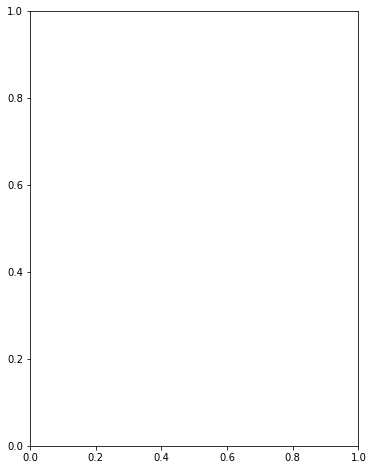

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(image)
ax1.title.set_text('Actual frame')
ax1.grid(b=None)


ax2 = fig.add_subplot(1,3,2)
ax2.set_title('Ground truth labels')
ax2.imshow(label)
ax2.grid(b=None)

ax3 = fig.add_subplot(1,3,3)
ax3.set_title('Predicted labels')
ax3.imshow(output)
ax3.grid(b=None)

plt.show()

In [ ]:
def main():
    _, palette = util.get_label_info(os.path.join(config.data_dir, "class_dict.csv"))

    model = nn.build_model(classes=len(palette))
    model(tf.zeros((1, config.height, config.width, 3)))

    file_names = [file_name[:-4] for file_name in os.listdir(os.path.join(config.data_dir, config.test_img_dir))]
    for file_name in tqdm.tqdm(file_names):
        image = util.load_image(file_name)
        label = util.load_label(file_name)
        image, label = util.random_crop(image, label)

        image = np.expand_dims(image, 0).astype('float32')

        output = model.predict(image / 255.0)
        output = np.array(output[0, :, :, :])
        output = np.argmax(output, axis=-1)
        output = util.colour_code_segmentation(output, palette)
        output = np.uint8(output)
        util.save_images([output, label], os.path.join('results', f'{file_name}.png'), titles=['Pred', 'Label'])


if __name__ == '__main__':
    if not os.path.exists('results'):
        os.makedirs('results')
    main()

In [8]:
import os
import sys
import multiprocessing

import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from net import nn
from utils import config, util
from utils.dataset import input_fn
import json, multiprocessing

# Import libraries
from absl import app
from absl import flags
from absl import logging
from official.common import distribute_utils
from official.utils.flags import core as flags_core

FLAGS = flags.FLAGS

In [16]:
cluster_resolver = tf.distribute.cluster_resolver.TPUClusterResolver(
    tpu='spatial-1')
tf.config.experimental_connect_to_cluster(cluster_resolver)
tf.tpu.experimental.initialize_tpu_system(cluster_resolver)
tpu_strategy = tf.distribute.TPUStrategy(cluster_resolver)

In [6]:
tpu_strategy.

<bound method StrategyBase.scope of <tensorflow.python.distribute.tpu_strategy.TPUStrategyV2 object at 0x7f2026a14f50>>

In [11]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

#Sets the threshold for what messages will be logged.
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

np.random.seed(config.seed)
tf.random.set_seed(config.seed)

cluster_resolver = tf.distribute.cluster_resolver.TPUClusterResolver(
    tpu='spatial-1')
tf.config.experimental_connect_to_cluster(cluster_resolver)
tf.tpu.experimental.initialize_tpu_system(cluster_resolver)
strategy = tf.distribute.TPUStrategy(cluster_resolver)
#strategy = tf.distribute.MirroredStrategy()

_, palette = util.get_label_info(os.path.join(config.data_dir, 'class_dict.csv'))

import json
path =os.path.join(config.data_dir,config.data_splits)
with open(path, 'r') as JSON:
    json_dict = json.load(JSON)
file_names =json_dict[prov][1]
#file_names = [file_name[:-4] for file_name in os.listdir(os.path.join(config.data_dir, config.image_dir))]

with open('data_.json', 'r') as JSON:
    json_dict_ = json.load(JSON)
weights = np.array(json_dict_[prov], np.float32)

dataset = input_fn(file_names, palette)
dataset = strategy.experimental_distribute_dataset(dataset)
#weights = util.get_class_weights(file_names)

with strategy.scope():
    optimizer = tf.keras.optimizers.Adam(learning_rate =0.0001)
    model = nn.build_model((config.height, config.width, 3), len(palette))
    model(tf.zeros((1, config.height, config.width, 3)))

with strategy.scope():
    loss_fn = nn.segmentation_loss(weights)


    def compute_loss(y_true, y_pred):
        return tf.reduce_sum(loss_fn(y_true, y_pred)) * 1. / config.batch_size

with strategy.scope():
    def train_step(image, y_true):
        with tf.GradientTape() as tape:
            y_pred = model(image)
            loss = compute_loss(y_true, y_pred)
        train_variable = model.trainable_variables
        gradient = tape.gradient(loss, train_variable)
        optimizer.apply_gradients(zip(gradient, train_variable))

        return loss

with strategy.scope():
    @tf.function
    def distribute_train_step(image, y_true):
        loss = strategy.experimental_run(train_step, args=(image, y_true))
        return strategy.reduce(tf.distribute.ReduceOp.SUM, loss, axis=None)

(256, 256, 3)


In [10]:
prov = 'EC'

In [17]:
import os
import sys
import multiprocessing

import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from net import nn
from utils import config, util
from utils.dataset import input_fn
import json, multiprocessing

# Import libraries
from absl import app
from absl import flags
from absl import logging
from official.common import distribute_utils
from official.utils.flags import core as flags_core

FLAGS = flags.FLAGS


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

#Sets the threshold for what messages will be logged.
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

np.random.seed(config.seed)
tf.random.set_seed(config.seed)

cluster_resolver = tf.distribute.cluster_resolver.TPUClusterResolver(
    tpu='spatial-1')
tf.config.experimental_connect_to_cluster(cluster_resolver)
tf.tpu.experimental.initialize_tpu_system(cluster_resolver)
strategy = tf.distribute.TPUStrategy(cluster_resolver)
#strategy = tf.distribute.MirroredStrategy()

_, palette = util.get_label_info(os.path.join(config.data_dir, 'class_dict.csv'))

import json
path =os.path.join(config.data_dir,config.data_splits)
with open(path, 'r') as JSON:
    json_dict = json.load(JSON)
file_names =json_dict[prov][1]
#file_names = [file_name[:-4] for file_name in os.listdir(os.path.join(config.data_dir, config.image_dir))]

with open('data_.json', 'r') as JSON:
    json_dict_ = json.load(JSON)
weights = np.array(json_dict_[prov], np.float32)

dataset = input_fn(file_names, palette)
dataset = strategy.experimental_distribute_dataset(dataset)
#weights = util.get_class_weights(file_names)

with strategy.scope():
    optimizer = tf.keras.optimizers.Adam(learning_rate =0.0001)
    model = nn.build_model((config.height, config.width, 3), len(palette))
    model(tf.zeros((1, config.height, config.width, 3)))

with strategy.scope():
    loss_fn = nn.segmentation_loss(weights)


    def compute_loss(y_true, y_pred):
        return tf.reduce_sum(loss_fn(y_true, y_pred)) * 1. / config.batch_size

with strategy.scope():
    def train_step(image, y_true):
        with tf.GradientTape() as tape:
            y_pred = model(image)
            loss = compute_loss(y_true, y_pred)
        train_variable = model.trainable_variables
        gradient = tape.gradient(loss, train_variable)
        optimizer.apply_gradients(zip(gradient, train_variable))

        return loss

with strategy.scope():
    @tf.function
    def distribute_train_step(image, y_true):
        loss = strategy.experimental_run(train_step, args=(image, y_true))
        return strategy.reduce(tf.distribute.ReduceOp.SUM, loss, axis=None)


def main():
    
    steps = len(file_names) // config.batch_size
    if not os.path.exists('weights/collapsed/V2'):
        os.makedirs('weights/collapsed/V2')
    pb = tf.keras.utils.Progbar(steps, stateful_metrics=['loss',tf.keras.metrics.MeanIoU(num_classes=4)])
    for step, inputs in enumerate(dataset):
        if step % steps == 0:
            print(f'Epoch {step // steps + 1}/{config.epochs}')
            pb = tf.keras.utils.Progbar(steps, stateful_metrics=['loss',tf.keras.metrics.MeanIoU(num_classes=4)])
        step += 1
        image, y_true = inputs
        loss = distribute_train_step(image, y_true)
        pb.add(1, [('loss', loss)])
        if step % steps == 0:
            model.save_weights(os.path.join("weights","collapsed", prov+f"_model_v2.h5"))
        if step // steps == config.epochs:
            sys.exit("--- Stop Training ---")
    #     return prov+':---done'





#     gt = {}
#     provinces =['EC','FS','GT','KZN','LIM','MP','NC','NW','WC']
#     for prov in provinces:

#         path =os.path.join(config.data_dir,config.data_splits)
#         with open(path, 'r') as JSON:
#             json_dict = json.load(JSON)
#         file_names =json_dict[prov][1] 

#         with multiprocessing.Pool(multiprocessing.cpu_count()) as pool:
#             frequencies = pool.map(calculate_class_weight, file_names)
#         pool.close()
#         _, palette = util.get_label_info(os.path.join(config.data_dir, 'class_dict.csv'))
#         label_to_frequency = {}
#         for i, label in enumerate(palette):
#             label_to_frequency[i] = 0

#         for frequency in frequencies:
#             label_to_frequency[0] += frequency[0]
#             label_to_frequency[1] += frequency[1]
#             label_to_frequency[2] += frequency[2]
#             label_to_frequency[3] += frequency[3]

#         class_weights = []
#         total_frequency = sum(label_to_frequency.values())
#         for label, frequency in label_to_frequency.items():
#             class_weight = 1 / np.log(1.02 + (frequency / total_frequency))
#             class_weights.append(class_weight)
#         #class_weights = np.array(class_weights, np.float32)


# #         gt[prov] =class_weights

# #     with open('data_.json', 'w') as fp:
# #         json.dump(gt, fp)

#     provinces =['EC','FS','GT','KZN','LIM','MP','NC','NW','WC']
#     complete_provs =[]
#     for prov in provinces:
#         tmp = model_n(prov)
#         complete_provs.append(tmp)
        
#     print(complete_provs)
    
# #     with multiprocessing.Pool(multiprocessing.cpu_count()) as pool:
# #         frequencies = pool.map(model_n, provinces)
# #     pool.close()
    
    
    
if __name__ == '__main__':
    main()


(256, 256, 3)


UnavailableError: failed to connect to all addresses
Additional GRPC error information from remote target /job:localhost/replica:0/task:0/device:CPU:0:
:{"created":"@1627304189.894601846","description":"Failed to pick subchannel","file":"third_party/grpc/src/core/ext/filters/client_channel/client_channel.cc","file_line":4143,"referenced_errors":[{"created":"@1627304189.055878054","description":"failed to connect to all addresses","file":"third_party/grpc/src/core/ext/filters/client_channel/lb_policy/pick_first/pick_first.cc","file_line":398,"grpc_status":14}]}
	 [[{{node MultiDeviceIteratorGetNextFromShard}}]]
	 [[RemoteCall]]

In [30]:
def loadDataset(filenames):
    # Disable order to increase speed
    options = tf.data.Options()
    options.experimental_deterministic = False
    
    # Define a TFRecords dataset with all filenames
    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO)
    # Add options for the order to the dataset
    dataset = dataset.with_options(options)
    # Return a dataset
    dataset = dataset.map(readTFRecord, num_parallel_calls=AUTO)
    return dataset
def readTFRecord(example):
    # Parse the serialized example
    example = tf.io.parse_single_example(example, exampleStructure)
    return example['raw_image']
SHAPE = (256,256,3)
# Define structure of examples
exampleStructure = {'raw_image': tf.io.FixedLenFeature([np.prod(SHAPE)], tf.int64)}
filenames = file_names[:100]
# Allow self optimization
AUTO = tf.data.experimental.AUTOTUNE
data =loadDataset(filenames)

<ParallelMapDataset shapes: (196608,), types: tf.int64>

<ParallelMapDataset shapes: (196608,), types: tf.int64>

In [ ]:
# Define structure of examples
exampleStructure = {'raw_image': tf.io.FixedLenFeature([np.prod(SHAPE)], tf.int64)}


# Set the path to all data files
gcs_path = KaggleDatasets().get_gcs_path(PATH_DATA)

# Get a list of all files from the training folder
train_files = tf.io.gfile.glob(gcs_path + '/data_train/data_train/*.tfrecords')
# Get a list of all files from the testing folder
test_files = tf.io.gfile.glob(gcs_path + '/data_test/data_test/*.tfrecords')


# Create datasets from file names
train_dataset = loadDataset(train_files)
test_dataset = loadDataset(test_files)